In [109]:
import pandas as pd
import numpy as np
from itertools import combinations
import statistics
import math
from sklearn import metrics

In [110]:
def accuracy(x,y):
    check = list(x == y)
    correct = check.count(True)
    accuracy = correct/100
    return accuracy

def TPTNFPFN(x,answer):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(answer)):
        if answer[i] == 1:
            if x[i] == 1:
                TP += 1
            elif x[i] == 0:
                FN += 1
        elif answer[i] == 0:
            if x[i] == 0:
                TN += 1
            elif x[i] == 1:
                FP += 1
    print(f'TP is {TP}')
    print(f'TN is {TN}')
    print(f'FP is {FP}')
    print(f'FN is {FN}')
    return TP, TN, FP, FN

# Image-based

## Majority Vote (MV)

In [111]:
dataset = pd.read_csv('./Image_based_data/rate100.csv')
dataset.head()

,Classification,배포용 순서 1,No.,ID,age,sex,CT date,x-ray date,Pathology,confirm,...,R14_1,R15_1,R16_1,R20_1,R21_1,R23_1,R26_1,R28_1,R29_1,AI
0,Nodule,1,1,49766482,80,F,2019-01-08,2019-02-12,ADC,PCNBx and Op,...,0,1,1,1,1,1,1,1,1,1
1,Normal,2,2,38188392,74,M,2020-05-12,2020-05-12,NaN,NaN,...,1,1,0,0,0,0,1,0,0,0
2,Normal,3,3,39610373,51,M,2018-04-11,2018-04-11,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,Normal,4,4,36808993,66,F,2017-02-03,2017-02-03,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
4,Nodule,7,5,52094912,67,F,2019-01-30,2019-03-17,ADC,PCNBx and Op,...,1,1,1,1,1,0,1,1,1,0


In [112]:
dataset.columns

Index(['Classification', '배포용 순서 1', 'No.', 'ID', 'age', 'sex', 'CT date',
       'x-ray date', 'Pathology', 'confirm', 'Type', 'Type.1', 'Location',
       'Size_CT', 'Structure', 'obscure',
       'visible (visible: 1; equivocal: 0; normal: 2)', 'CT answer', 'R11_1',
       'R14_1', 'R15_1', 'R16_1', 'R20_1', 'R21_1', 'R23_1', 'R26_1', 'R28_1',
       'R29_1', 'AI'],
      dtype='object')

In [113]:
dataset[['CT answer']].to_csv(f'./constructed/image-based_CT.csv', index=None)
pd.read_csv(f'./constructed/image-based_CT.csv')

,CT answer
0,1
1,0
2,0
3,0
4,1
...,...
95,0
96,1
97,1
98,0


In [114]:
raters = ['R11_1', 'R14_1', 'R15_1', 'R16_1', 'R20_1', 'R21_1', 'R23_1', 'R26_1', 'R28_1', 'R29_1']

In [115]:
rates = dataset[raters]
rates.head(3)

,R11_1,R14_1,R15_1,R16_1,R20_1,R21_1,R23_1,R26_1,R28_1,R29_1
0,1,0,1,1,1,1,1,1,1,1
1,0,1,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0


In [116]:
def kmajority_votes(k):
    majority_votes = {}
    for idx, selected_raters in enumerate(list(combinations(raters,k))):
        selected_raters = list(selected_raters)
        majority_vote = np.array(rates[selected_raters].mode(axis=1)[0]).astype(int)
        majority_votes[f'{k}vote{idx}']=majority_vote
    return majority_votes

In [ ]:
majority_votes_9 = kmajority_votes(9)
majority_votes_7 = kmajority_votes(7)
majority_votes_5 = kmajority_votes(5)
majority_votes_3 = kmajority_votes(3)
majority_votes_1 = kmajority_votes(1)

In [118]:
# save to csv
majority_votes_k = [0,majority_votes_1,0,majority_votes_3,0,majority_votes_5,0,majority_votes_7,0,majority_votes_9]
for k in [1,3,5,7,9]:
    result = pd.DataFrame.from_dict(majority_votes_k[k])
    result.to_csv(f'./constructed/image-based_{k}_majority_votes.csv', index=None)

NameError: name 'majority_votes_1' is not defined

In [ ]:
# check the raters of (k)votes(idx)
k = 9
idx = 3
list(combinations(raters,k))[idx]

In [119]:
def average_accuracy(k):
    accuracies=[]
    for i in range(len(list(combinations(raters,k)))):
        selected_raters = list(combinations(raters,k))[i]
        majority_votes_df = pd.read_csv(f'./constructed/image-based_{k}_majority_votes.csv')
        acc = accuracy(majority_votes_df[f'{k}vote{i}'],dataset['CT answer'])
        accuracies.append(acc)
#         print(f'The accuracy of {k}votes{i} is {acc}')
    #     print(f'The accuracy of {k} majority vote by {selected_raters} is {acc}')

    average_accuracy_ = statistics.mean(accuracies)
    sd_accuracy_ = statistics.stdev(accuracies)
    print(f'=={k} majority votes accuracy [n = {len(list(combinations(raters,k)))}]==')
    print(f'ㄴaverage: {average_accuracy_}')
    print(f'ㄴstandard deviation: {sd_accuracy_}')

    return accuracies, average_accuracy_, sd_accuracy_

==1 majority votes accuracy [n = 10]==
ㄴaverage: 0.785
ㄴstandard deviation: 0.04006938426723769


Text(0.5, 1.0, '1 majority votes [n=10]')

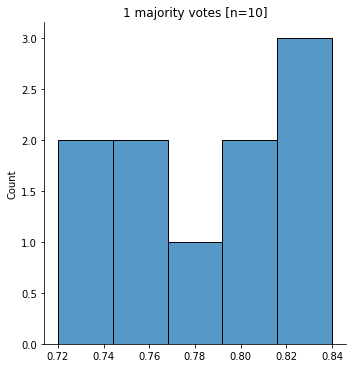

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(average_accuracy(1)[0])
plt.title('1 majority votes [n=10]')

In [547]:
average_accuracy(9)
average_accuracy(7)
average_accuracy(5)
average_accuracy(3)
average_accuracy(1)

#Mplus Demo
#p-value
#Consensus Reading tool 올려준다 --> ROI

==9 majority votes accuracy [n = 10]==
ㄴaverage: 0.84
ㄴstandard deviation: 0.011547005383792526
==7 majority votes accuracy [n = 120]==
ㄴaverage: 0.8366666666666667
ㄴstandard deviation: 0.01259140251786698
==5 majority votes accuracy [n = 252]==
ㄴaverage: 0.8289285714285715
ㄴstandard deviation: 0.0187253917438066
==3 majority votes accuracy [n = 120]==
ㄴaverage: 0.8185
ㄴstandard deviation: 0.025293238210234426
==1 majority votes accuracy [n = 10]==
ㄴaverage: 0.785
ㄴstandard deviation: 0.04006938426723769


([0.81, 0.77, 0.81, 0.74, 0.82, 0.76, 0.76, 0.72, 0.84, 0.82],
 0.785,
 0.04006938426723769)

==9 majority votes accuracy [n = 10]==
ㄴaverage: 0.84
ㄴstandard deviation: 0.011547005383792526
==7 majority votes accuracy [n = 120]==
ㄴaverage: 0.8366666666666667
ㄴstandard deviation: 0.01259140251786698
==5 majority votes accuracy [n = 252]==
ㄴaverage: 0.8289285714285715
ㄴstandard deviation: 0.0187253917438066
==3 majority votes accuracy [n = 120]==
ㄴaverage: 0.8185
ㄴstandard deviation: 0.025293238210234426
==1 majority votes accuracy [n = 10]==
ㄴaverage: 0.785
ㄴstandard deviation: 0.04006938426723769


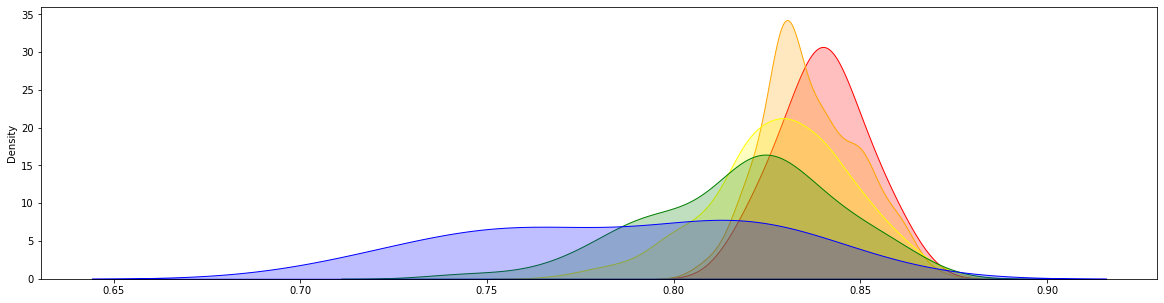

In [389]:
plt.figure(figsize=(20,5))

sns.kdeplot(data = average_accuracy(9)[0], color="red", shade=True)
sns.kdeplot(data = average_accuracy(7)[0], color="orange", shade=True)
sns.kdeplot(data = average_accuracy(5)[0], color="yellow", shade=True)
sns.kdeplot(data = average_accuracy(3)[0], color="green", shade=True)
sns.kdeplot(data = average_accuracy(1)[0], color="blue", shade=True)
plt.show()

In [121]:
avg_acc9 = average_accuracy(9)[0]
avg_acc7 = average_accuracy(7)[0]
avg_acc5 = average_accuracy(5)[0]
avg_acc3 = average_accuracy(3)[0]
avg_acc1 = average_accuracy(1)[0]

==9 majority votes accuracy [n = 10]==
ㄴaverage: 0.84
ㄴstandard deviation: 0.011547005383792526
==7 majority votes accuracy [n = 120]==
ㄴaverage: 0.8366666666666667
ㄴstandard deviation: 0.01259140251786698
==5 majority votes accuracy [n = 252]==
ㄴaverage: 0.8289285714285715
ㄴstandard deviation: 0.0187253917438066
==3 majority votes accuracy [n = 120]==
ㄴaverage: 0.8185
ㄴstandard deviation: 0.025293238210234426
==1 majority votes accuracy [n = 10]==
ㄴaverage: 0.785
ㄴstandard deviation: 0.04006938426723769


In [131]:
from scipy import stats

t_stat, p_val = stats.ttest_ind(avg_acc3, avg_acc1,
                                equal_var=False)
print(f"t-statistics:{t_stat}, p-value: {p_val}")

t-statistics:2.600991350060612, p-value: 0.027267265372131644


## Individual

In [548]:
raters

['R11_1',
 'R14_1',
 'R15_1',
 'R16_1',
 'R20_1',
 'R21_1',
 'R23_1',
 'R26_1',
 'R28_1',
 'R29_1']

In [549]:
average_accuracy(1)

==1 majority votes accuracy [n = 10]==
ㄴaverage: 0.785
ㄴstandard deviation: 0.04006938426723769


([0.81, 0.77, 0.81, 0.74, 0.82, 0.76, 0.76, 0.72, 0.84, 0.82],
 0.785,
 0.04006938426723769)

## Consensus

In [257]:
cons2 = pd.read_csv('./constructed/lesion-based_consensus2.csv')
cons2 = cons2.drop_duplicates(['DB_PatientId'])
cons2['Answer'] = list(cons2['mask'] != '0')
cons2['Answer'] = cons2['Answer'].replace({True:1, False:0})
cons2 = cons2[['Answer']]
cons2.to_csv('./constructed/image-based_consensus2.csv', index = None)
cons2

,Answer
0,1
1,0
2,0
3,0
4,0
...,...
96,0
97,1
98,1
99,0


In [601]:
cons3 = pd.read_csv('./constructed/lesion-based_consensus3.csv')
cons3['Answer'] = list(cons3['2D_maskpos'] != '0')
cons3['Answer'] = cons3['Answer'].replace({True:1, False:0})
cons3 = cons3[['Answer']]
cons3.to_csv('./constructed/image-based_consensus3.csv', index = None)
cons3

,Answer
0,1
1,1
2,0
3,0
4,1
...,...
95,0
96,1
97,0
98,0


## LCA

In [552]:
lca_df = pd.read_csv('./Image_based_lca/lca2_save.txt', names = raters + ['C1', 'C2', 'Answer', 'ID'], delimiter = "\s+")
lca_df['Answer'].replace({1:1, 2: 0}, inplace=True)
lca_df = lca_df[['Answer']].astype(int)
lca_df.to_csv(f'./constructed/image-based_lca_2.csv', index=None)
pd.read_csv(f'./constructed/image-based_lca_2.csv')
lca_df

,Answer
0,1
1,0
2,0
3,0
4,1
...,...
95,0
96,1
97,1
98,0


In [553]:
lca_df = pd.read_csv('./Image_based_lca/lca3_save.txt', names = raters + ['C1', 'C2', 'C3', 'Answer', 'ID'], delimiter = "\s+")
lca_df['Answer'].replace({1:1, 2: 1, 3:0}, inplace=True)
lca_df = lca_df[['Answer']].astype(int)
lca_df.to_csv(f'./constructed/image-based_lca_3.csv', index=None)
lca_df = pd.read_csv(f'./constructed/image-based_lca_3.csv')
lca_df

,Answer
0,1
1,0
2,0
3,0
4,1
...,...
95,0
96,1
97,1
98,0


## MV-LCA

In [664]:
lca_df = pd.read_csv('./Image_based_lca/mvlca2_save.txt', names = raters + ['C1', 'C2', 'Answer', 'ID'], delimiter = "\s+")
lca_df['Answer'].replace({1:1, 2: 0}, inplace=True)
lca_df = lca_df[['Answer']].astype(int)
lca_df.to_csv(f'./constructed/image-based_mvlca_2.csv', index=None)
pd.read_csv(f'./constructed/image-based_mvlca_2.csv')
lca_df

,Answer
0,1
1,0
2,0
3,0
4,1
...,...
95,0
96,1
97,1
98,0


In [666]:
lca_df = pd.read_csv('./Image_based_lca/mvlca3_save.txt', names = raters + ['C1', 'C2', 'C3', 'Answer', 'ID'], delimiter = "\s+")
lca_df['Answer'].replace({1:1, 2: 1, 3:0}, inplace=True)
lca_df = lca_df[['Answer']].astype(int)
lca_df.to_csv(f'./constructed/image-based_mvlca_3.csv', index=None)
lca_df = pd.read_csv(f'./constructed/image-based_mvlca_3.csv')
lca_df

,Answer
0,1
1,0
2,0
3,0
4,1
...,...
95,0
96,1
97,1
98,0


## Accuracy

### Individual

In [638]:
ct_answer = pd.read_csv(f'./constructed/image-based_CT.csv')['CT answer']
indiv_answer = pd.read_csv(f'./constructed/image-based_1_majority_votes.csv')['1vote4']
TPTNFPFN(indiv_answer,ct_answer)
print(f'accuracy: {accuracy(ct_answer,indiv_answer)}')
print(f'cohen kappa: {metrics.cohen_kappa_score(indiv_answer, ct_answer)}')

TP is 35
TN is 47
FP is 3
FN is 15
accuracy: 0.82
cohen kappa: 0.64


### MV

In [649]:
ct_answer = pd.read_csv(f'./constructed/image-based_CT.csv')['CT answer']
mv_answer = pd.read_csv(f'./constructed/image-based_1_majority_votes.csv')['1vote1']
TPTNFPFN(mv_answer,ct_answer)
print(f'accuracy: {accuracy(mv_answer,ct_answer)}')
print(f'cohen kappa: {metrics.cohen_kappa_score(mv_answer, ct_answer)}')

TP is 35
TN is 42
FP is 8
FN is 15
accuracy: 0.77
cohen kappa: 0.54


### Consensus

In [264]:
ct_answer = pd.read_csv(f'./constructed/image-based_CT.csv')['CT answer']
cons_answer = pd.read_csv(f'./constructed/image-based_consensus2.csv')['Answer']
TPTNFPFN(cons_answer,ct_answer)
print(f'accuracy: {accuracy(ct_answer,cons_answer)}')
print(f'cohen kappa: {metrics.cohen_kappa_score(cons_answer, ct_answer)}')

TP is 31
TN is 50
FP is 0
FN is 19
accuracy: 0.81
cohen kappa: 0.62


In [650]:
ct_answer = pd.read_csv(f'./constructed/image-based_CT.csv')['CT answer']
cons_answer = pd.read_csv(f'./constructed/image-based_consensus3.csv')['Answer']
TPTNFPFN(cons_answer,ct_answer)
print(f'accuracy: {accuracy(ct_answer,cons_answer)}')
print(f'cohen kappa: {metrics.cohen_kappa_score(cons_answer, ct_answer)}')

TP is 30
TN is 49
FP is 1
FN is 20
accuracy: 0.79
cohen kappa: 0.5800000000000001


### LCA

In [651]:
ct_answer = pd.read_csv(f'./constructed/image-based_CT.csv')['CT answer']
lca_answer = pd.read_csv(f'./constructed/image-based_lca_2.csv')['Answer']
TPTNFPFN(lca_answer,ct_answer)
print(f'accuracy: {accuracy(ct_answer,lca_answer)}')
print(f'cohen kappa: {metrics.cohen_kappa_score(lca_answer, ct_answer)}')

TP is 36
TN is 50
FP is 0
FN is 14
accuracy: 0.86
cohen kappa: 0.72


In [652]:
ct_answer = pd.read_csv(f'./constructed/image-based_CT.csv')['CT answer']
lca_answer = pd.read_csv(f'./constructed/image-based_lca_3.csv')['Answer']
TPTNFPFN(lca_answer,ct_answer)
print(f'accuracy: {accuracy(ct_answer,lca_answer)}')
print(f'cohen kappa: {metrics.cohen_kappa_score(lca_answer, ct_answer)}')

TP is 37
TN is 50
FP is 0
FN is 13
accuracy: 0.87
cohen kappa: 0.74


### MV-LCA

In [660]:
ct_answer = pd.read_csv(f'./constructed/image-based_CT.csv')['CT answer']
mvlca_answer = pd.read_csv(f'./constructed/image-based_mvlca_2.csv')['Answer']
TPTNFPFN(mvlca_answer,ct_answer)
print(f'accuracy: {accuracy(ct_answer,mvlca_answer)}')
print(f'cohen kappa: {metrics.cohen_kappa_score(mvlca_answer, ct_answer)}')

TP is 36
TN is 50
FP is 0
FN is 14
accuracy: 0.86
cohen kappa: 0.72


In [661]:
ct_answer = pd.read_csv(f'./constructed/image-based_CT.csv')['CT answer']
mvlca_answer = pd.read_csv(f'./constructed/image-based_mvlca_3.csv')['Answer']
TPTNFPFN(mvlca_answer,ct_answer)
print(f'accuracy: {accuracy(ct_answer,mvlca_answer)}')
print(f'cohen kappa: {metrics.cohen_kappa_score(mvlca_answer, ct_answer)}')

TP is 36
TN is 50
FP is 0
FN is 14
accuracy: 0.86
cohen kappa: 0.72


# Lesion-based

In [272]:
df = pd.read_excel("./Image_based_data/Per_lesion.xlsx", engine='openpyxl')
delete_case = np.array(df['제외번호 case ID'])[:20].astype(int)
case_map = df[['배포용 순서 1', 'No.']][:100].astype(int)

delete_case
case_map

,배포용 순서 1,No.
0,1,1
1,2,2
2,3,3
3,4,4
4,7,5
...,...,...
95,114,96
96,116,97
97,117,98
98,118,99


In [273]:
def map(i):
    if i not in list(case_map['배포용 순서 1']):
        print(f'{i} is not in case_map')
    idx = list(case_map['배포용 순서 1']).index(i)
    
    return case_map['No.'][idx]    

## CT answer

In [274]:
def boxreform(box):
    if box == 0: return 0
    else:
        coor = np.array([0,0,0,0])
        coor[0] += int(box.split('-')[0][1:-1].split(',')[0])
        coor[1] += int(box.split('-')[0][1:-1].split(',')[1])
        coor[2] += int(box.split('-')[1][1:-1].split(',')[0])
        coor[3] += int(box.split('-')[1][1:-1].split(',')[1])
        return coor

In [275]:
ct = pd.read_csv(f'./Lesion_based_data/CT_answer.csv')
ct = ct[['DB_PatientId', '2D_maskpos']]
ct = ct.sort_values(by=['DB_PatientId'])
# result = result[~result.DB_PatientId.isin(delete_case)]
ct = ct.reset_index(drop=True)
# result['DB_PatientId'] = [map(i) for i in result['DB_PatientId']]
ct = ct.fillna(0)

new_mask_lst = []
for mask in ct['2D_maskpos']:
    new_mask_lst.append(boxreform(mask))
ct = ct[['DB_PatientId']]
ct['mask'] = new_mask_lst
ct.to_csv(f'./constructed/lesion-based_CT.csv', index=None)

## Consensus 2

In [294]:
cons2 = pd.read_csv(f'./Lesion_based_data/Consensus2.csv')
cons2 = cons2.sort_values(by=['DB_PatientId'])
cons2 = cons2[['DB_PatientId','2D_maskpos']].fillna(0)

coor_lst = []
for x in cons2['2D_maskpos']:
    if x == 0: coor_lst.append(0)
    else:
        coor = np.array([int(x.split('-')[0][1:-1].split(',')[0])
                        ,int(x.split('-')[0][1:-1].split(',')[1])
                        ,int(x.split('-')[1][1:-1].split(',')[0])
                        ,int(x.split('-')[1][1:-1].split(',')[1])])
        coor_lst.append(coor)

cons2['mask'] = coor_lst
cons2 = cons2[['DB_PatientId', 'mask']]
cons2.to_csv(f'./constructed/lesion-based_consensus2.csv', index=None)
# cons2

## Consensus 3

In [277]:
cons3 = pd.read_csv(f'./Lesion_based_data/Consensus3.csv')
cons3 = cons3.sort_values(by=['DB_PatientId'])
cons3 = cons3[['DB_PatientId','2D_maskpos']].fillna(0)

coor_lst = []
for x in cons3['2D_maskpos']:
    if x == 0: coor_lst.append(0)
    else:
        coor = np.array([int(x.split('-')[0][1:-1].split(',')[0])
                        ,int(x.split('-')[0][1:-1].split(',')[1])
                        ,int(x.split('-')[1][1:-1].split(',')[0])
                        ,int(x.split('-')[1][1:-1].split(',')[1])])
        coor_lst.append(coor)

cons3['mask'] = coor_lst
cons3 = cons3[['DB_PatientId', 'mask']]
cons3.to_csv(f'./constructed/lesion-based_consensus3.csv', index=None)
# cons3

## Majority Vote _ Preprocessing -- average mask

In [278]:
# 1    2    3    4    5    6    7    8    9    10
# R11, R14, R15, R16, R20, R21, R23, R26, R28, R29

raters = ['R11', 'R14', 'R15', 'R16', 'R20', 'R21', 'R23', 'R26', 'R28', 'R29']

In [279]:
def get_dataset(rater):
    dataset = pd.read_csv(f'./Lesion_based_data/{rater}_1.csv')
    dataset = dataset.sort_values(by=['DB_PatientId'])
    dataset = dataset[~dataset.DB_PatientId.isin(delete_case)]
    dataset = dataset.reset_index(drop=True)
    dataset[f'{rater}'] = 1
#     dataset[f'{rater}'] = [0 if str(mask) == 'nan' else 1 for mask in list(dataset['2D__maskpos'])]
    return dataset[['DB_PatientId', '2D__Lesion_Index', '2D__maskpos', f'{rater}']]

In [280]:
# 확인

# df = get_dataset(raters[0])

# df

# len(df[df['2D__Lesion_Index'].isin([None])]) # 0개 detect한 case 수
# len(df[df['2D__Lesion_Index'].isin([1])]) # 1개 detect한 case 수
# df[~df['2D__Lesion_Index'].isin([None, 1])] # 그 이상 detect한 cases

In [281]:
sum([len(get_dataset(rater)) for rater in raters])

1029

In [282]:
full_df = pd.concat([get_dataset(rater) for rater in raters])
full_df = full_df.sort_values(by=['DB_PatientId', '2D__maskpos'])

full_df = full_df.fillna(0)
for rater in raters:
#     full_df[rater] = full_df[rater].fillna(0)
    full_df[rater] = full_df[rater].astype(int)
    
full_df = full_df.groupby(['DB_PatientId', '2D__maskpos']).aggregate({rater:'sum' for rater in raters})
full_df = full_df.reset_index() #,'2D__Lesion_Index'
full_df['DB_PatientId'] = [map(i) for i in full_df['DB_PatientId']]
full_df['MaskId'] = list(range(len(full_df)))
# full_df[:20]
# full_df

In [283]:
def IoU(a,b): #a, b strings of shape '(1707,924,0)-(1959,1237,1)'    
    if a == 0 or b == 0:
        return 0
    
    else:
        A = np.array([a.split('-')[0][1:-1].split(',')[0],
             a.split('-')[0][1:-1].split(',')[1],
             a.split('-')[1][1:-1].split(',')[0],
             a.split('-')[1][1:-1].split(',')[1]]).astype(int)
        B = np.array([b.split('-')[0][1:-1].split(',')[0],
             b.split('-')[0][1:-1].split(',')[1],
             b.split('-')[1][1:-1].split(',')[0],
             b.split('-')[1][1:-1].split(',')[1]]).astype(int)

        # A = (x1, y1, x2, y2)
        A_area = (A[2] - A[0] + 1) * (A[3] - A[1] + 1)
        B_area = (B[2] - B[0] + 1) * (B[3] - B[1] + 1)

        # find intersection box
        x1 = max(A[0], B[0])
        y1 = max(A[1], B[1])
        x2 = min(A[2], B[2])
        y2 = min(A[3], B[3])

        # compute the width and height of the intersection
        w = max(0, x2 - x1 + 1)
        h = max(0, y2 - y1 + 1)

        inter = w * h
        iou = inter / (A_area + B_area - inter)

        return iou

In [284]:
IoU(full_df['2D__maskpos'][4],full_df['2D__maskpos'][5])

0.6819674446523781

In [285]:
lesion_df = full_df.copy()
lesion_df['lesion'] = 0
lesion_df = lesion_df.sort_values(by=['DB_PatientId', '2D__maskpos'])

# 바로 위 row mask와 iou가 0.3이상인 lesion들은 같은 lesion번호를 갖도록 lesion column 설정
i = 0
for r in range(1,len(lesion_df)):
    indication = 0
    for j in range(list(lesion_df['DB_PatientId']).index(lesion_df['DB_PatientId'][r]),r):
        if IoU(lesion_df['2D__maskpos'][j],lesion_df['2D__maskpos'][r]) > 0.01:
            lesion_df['lesion'][r] = lesion_df['lesion'][j]
            indication = 1
        
    if indication == 0: # 겹치는 box가 없음
        i += 1
        lesion_df['lesion'][r] = i
    

# i = 0
# for r in range(1,len(lesion_df)):
#     if IoU(lesion_df['2D__maskpos'][r-1],lesion_df['2D__maskpos'][r]) < 0.01:
#         i += 1    
#     lesion_df['lesion'][r] = i

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [286]:
def mask_avg(rowlist):
    if lesion_df['2D__maskpos'][rowlist[0]] == 0: return 0
    else:
        coor = np.array([0,0,0,0])
        for row in rowlist:
            a = lesion_df['2D__maskpos'][row]
            coor[0] += int(a.split('-')[0][1:-1].split(',')[0])
            coor[1] += int(a.split('-')[0][1:-1].split(',')[1])
            coor[2] += int(a.split('-')[1][1:-1].split(',')[0])
            coor[3] += int(a.split('-')[1][1:-1].split(',')[1])
        coor = coor/len(rowlist)
        return np.round(coor,2)

In [287]:
# 같은 번호의 lesion mask들의 average mask 연산.

avg_masks = []
for row in range(len(lesion_df)):
    avg_masks.append(mask_avg(list(np.where(np.array(lesion_df['lesion']) == lesion_df['lesion'][row])[0])))
lesion_df['avg_mask'] = avg_masks

In [288]:
# 같은 lesion mask들끼리 row 합치기
agg = {rater:'sum' for rater in raters}
agg['avg_mask'] = 'first'

lesion_df = lesion_df.groupby(['DB_PatientId', 'lesion']).aggregate(agg)

In [289]:
print(lesion_df.to_string())

                     R11  R14  R15  R16  R20  R21  R23  R26  R28  R29                             avg_mask
DB_PatientId lesion                                                                                       
1            0         0    1    0    0    0    0    0    0    0    0                                    0
             1         1    0    1    1    1    1    1    1    1    1  [1691.67, 976.44, 1933.33, 1204.22]
             2         1    0    0    0    0    0    0    0    0    0      [892.0, 1460.0, 1131.0, 1710.0]
2            3         1    0    0    1    1    1    1    0    1    1                                    0
             4         0    0    1    0    0    0    0    1    0    0      [979.5, 1240.5, 1148.5, 1417.0]
             5         0    1    0    0    0    0    0    0    0    0       [568.0, 1249.0, 770.0, 1460.0]
3            6         1    1    1    1    1    1    1    1    1    1                                    0
4            7         1    1    0   

In [290]:
lesion_df

R11  R14  R15  R16  R20  R21  R23  R26  R28  R29  \
DB_PatientId lesion                                                     
1            0         0    1    0    0    0    0    0    0    0    0   
             1         1    0    1    1    1    1    1    1    1    1   
             2         1    0    0    0    0    0    0    0    0    0   
2            3         1    0    0    1    1    1    1    0    1    1   
             4         0    0    1    0    0    0    0    1    0    0   
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
98           195       0    0    0    0    1    0    0    0    0    1   
             196       0    0    0    0    0    0    0    0    0    1   
             197       0    0    0    0    0    0    0    0    0    1   
99           198       1    1    1    1    1    1    1    1    1    1   
100          199       1    1    1    1    1    1    1    1    1    1   

                                                avg_mask  
DB_PatientId lesion                                       
1            0                                         0  
             1       [1691.67, 976.44, 1933.33, 1204.22]  
             2           [892.0, 1460.0, 1131.0, 1710.0]  
2            3                                         0  
             4           [979.5, 1240.5, 1148.5, 1417.0]  
...                                                  ...  
98           195          [580.0, 1535.5, 804.5, 1759.0]  
             196          [603.0, 1251.0, 779.0, 1427.0]  
             197         [799.0, 1402.0, 1020.0, 1579.0]  
99           198                                       0  
100          199         [1794.2, 997.9, 2070.3, 1242.4]  

[200 rows x 11 columns]

In [569]:
lesion_df = lesion_df.reset_index()
lesion_df.to_csv('./Lesion_based_data/lesion_df.csv', index = False)

## Majority Voting

In [90]:
lesion_df = pd.read_csv('./Lesion_based_data/lesion_df.csv')

In [91]:
agg = {rater:'sum' for rater in raters}
agg['avg_mask'] = 'first'

lesion_df = lesion_df.groupby(['DB_PatientId', 'lesion']).aggregate(agg)

In [92]:
lesion_df

R11  R14  R15  R16  R20  R21  R23  R26  R28  R29  \
DB_PatientId lesion                                                     
1            0         0    1    0    0    0    0    0    0    0    0   
             1         1    0    1    1    1    1    1    1    1    1   
             2         1    0    0    0    0    0    0    0    0    0   
2            3         1    0    0    1    1    1    1    0    1    1   
             4         0    0    1    0    0    0    0    1    0    0   
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
98           195       0    0    0    0    1    0    0    0    0    1   
             196       0    0    0    0    0    0    0    0    0    1   
             197       0    0    0    0    0    0    0    0    0    1   
99           198       1    1    1    1    1    1    1    1    1    1   
100          199       1    1    1    1    1    1    1    1    1    1   

                                              avg_mask  
DB_PatientId lesion                                     
1            0                                       0  
             1       [1691.67  976.44 1933.33 1204.22]  
             2               [ 892. 1460. 1131. 1710.]  
2            3                                       0  
             4           [ 979.5 1240.5 1148.5 1417. ]  
...                                                ...  
98           195         [ 580.  1535.5  804.5 1759. ]  
             196             [ 603. 1251.  779. 1427.]  
             197             [ 799. 1402. 1020. 1579.]  
99           198                                     0  
100          199         [1794.2  997.9 2070.3 1242.4]  

[200 rows x 11 columns]

In [66]:
# vote 수 계산
lesion_df['votes'] = list(lesion_df[raters].sum(axis=1))
# lesion_df = lesion_df.reset_index() #,'2D__Lesion_Index'

In [67]:
def kmajority_votes_df(k, df):
    majority_votes = {}
    for idx, selected_raters in enumerate(list(combinations(raters,k))):
        selected_raters = list(selected_raters)
        majority_vote = np.array(df[selected_raters].mode(axis=1)[0]).astype(int)
        majority_votes[f'{k}vote{idx}']=majority_vote
    return majority_votes

In [68]:
# 9
mv9_dict = kmajority_votes_df(9, lesion_df)
mv7_dict = kmajority_votes_df(7, lesion_df)
mv5_dict = kmajority_votes_df(5, lesion_df)
mv3_dict = kmajority_votes_df(3, lesion_df)
mv9_dict

{'9vote0': array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
        1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 1]),
 '9vote1': array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
  

In [69]:
# # 가장 높은 vote를 받은 애들만 남기기
# max_series = lesion_df.groupby(['DB_PatientId'])['votes'].transform('max') # 각 그룹의 row 개수만큼 max value를 나열한 series
# lesion_df = lesion_df[(lesion_df['votes']==max_series)]
# lesion_df[40:53]

In [70]:
print(lesion_df.to_string())

                     R11  R14  R15  R16  R20  R21  R23  R26  R28  R29                           avg_mask  votes
DB_PatientId lesion                                                                                            
1            0         0    1    0    0    0    0    0    0    0    0                                  0      1
             1         1    0    1    1    1    1    1    1    1    1  [1691.67  976.44 1933.33 1204.22]      9
             2         1    0    0    0    0    0    0    0    0    0          [ 892. 1460. 1131. 1710.]      1
2            3         1    0    0    1    1    1    1    0    1    1                                  0      7
             4         0    0    1    0    0    0    0    1    0    0      [ 979.5 1240.5 1148.5 1417. ]      2
             5         0    1    0    0    0    0    0    0    0    0          [ 568. 1249.  770. 1460.]      1
3            6         1    1    1    1    1    1    1    1    1    1                                  0

In [75]:
lesion_mask_df = lesion_df.reset_index()[['DB_PatientId','avg_mask']]

In [74]:
majority_votes_k = [0,0,0,mv3_dict,0,mv5_dict,0,mv7_dict,0,mv9_dict]
for k in [3,5,7,9]:
    result = lesion_mask_df.copy()
    for key in majority_votes_k[k].keys():
        result[key] = majority_votes_k[k][key]
    result.rename(columns = {'avg_mask' : 'mask'}, inplace = True)
    result.to_csv(f'./constructed/lesion-based_{k}_majority_votes.csv', index=None)

ValueError: Length of values (200) does not match length of index (100)

In [ ]:
k=7
temp = pd.read_csv(f'./constructed/lesion-based_{k}_majority_votes.csv')
temp

## Individual

In [ ]:
def boxreform(box):
    if box == 0: return 0
    else:
        coor = np.array([0,0,0,0])
        coor[0] += int(box.split('-')[0][1:-1].split(',')[0])
        coor[1] += int(box.split('-')[0][1:-1].split(',')[1])
        coor[2] += int(box.split('-')[1][1:-1].split(',')[0])
        coor[3] += int(box.split('-')[1][1:-1].split(',')[1])
        return coor

In [ ]:
result = pd.read_csv('./Lesion_based_data/R20_1.csv')
result = result[['DB_PatientId', '2D__maskpos']]
result = result.sort_values(by=['DB_PatientId'])
result = result[~result.DB_PatientId.isin(delete_case)]
result = result.reset_index(drop=True)
result['DB_PatientId'] = [map(i) for i in result['DB_PatientId']]
result = result.fillna(0)

new_mask_lst = []
for mask in result['2D__maskpos']:
    new_mask_lst.append(boxreform(mask))
result = result[['DB_PatientId']]
result['mask'] = new_mask_lst
result.to_csv(f'./constructed/lesion-based_R20.csv', index=None)

## LCA

In [93]:
lesion_mask_df = lesion_df.reset_index()

In [95]:
result = lesion_mask_df.copy()
lca_df = pd.read_csv('./Lesion_based_lca/lesionlca2_save.txt', names = raters + ['C1', 'C2', 'Answer', 'ID'], delimiter = "\s+")
lca_df['Answer'].replace({1:1, 2: 0}, inplace=True)
result['Answer'] = lca_df['Answer'].astype(int)
result = result[result['Answer']==1][['DB_PatientId', 'avg_mask']]
result.rename(columns = {'avg_mask' : 'mask'}, inplace = True)
result.to_csv(f'./constructed/lesion-based_lca_2.csv', index=None)
df = pd.read_csv(f'./constructed/lesion-based_lca_2.csv')
len(set(result['DB_PatientId']))
# result

94

In [97]:
set(range(1,101)) - set(result['DB_PatientId'])

{43, 49, 60, 64, 73, 98}

In [98]:
result = lesion_mask_df.copy()
lca_df = pd.read_csv('./Lesion_based_lca/lesionlca3_save.txt', names = raters + ['C1', 'C2', 'C3', 'Answer', 'ID'], delimiter = "\s+")
lca_df['Answer'].replace({1:1, 2: 1, 3:0}, inplace=True)
result['Answer'] = lca_df['Answer'].astype(int)
result = result[result['Answer']==1][['DB_PatientId', 'avg_mask']]
result.rename(columns = {'avg_mask' : 'mask'}, inplace = True)
result.to_csv(f'./constructed/lesion-based_lca_3.csv', index=None)
df = pd.read_csv(f'./constructed/lesion-based_lca_3.csv')
len(set(result['DB_PatientId']))

100

#### check -- problem in MV and LCA
--> Sol) Just omit those cases

In [100]:
k=9
i=0

In [104]:
df = pd.read_csv(f'./constructed/lesion-based_{k}_majority_votes.csv')
df = df[df[f'{k}vote{i}']==1][['DB_PatientId', 'mask']]
omit_lst = list(set(range(1,101))-set(df['DB_PatientId']))
omit_lst

[64, 49, 73]

In [110]:
[1,2,3]+[2,3,4]

[1, 2, 3, 2, 3, 4]

In [113]:
omits = []
for k in [3,5,7,9]:
    for i in range(len(list(combinations(raters,k)))):
        df = pd.read_csv(f'./constructed/lesion-based_{k}_majority_votes.csv')
        df = df[df[f'{k}vote{i}']==1][['DB_PatientId', 'mask']]
        omit_lst = list(set(range(1,101))-set(df['DB_PatientId']))
        omits = omits + omit_lst
set(omits)

{2,
 5,
 6,
 18,
 24,
 27,
 36,
 38,
 44,
 49,
 50,
 60,
 64,
 67,
 69,
 71,
 73,
 77,
 88,
 97,
 98}

In [102]:
list(combinations(raters,k))[0]

('R11', 'R14', 'R15', 'R16', 'R20', 'R21', 'R23', 'R26', 'R28')

In [103]:
lesion_df = pd.read_csv('./Lesion_based_data/lesion_df.csv').reset_index(drop=True)
lesion_df = lesion_df[lesion_df['DB_PatientId']==omit_lst[1]]
lesion_df

,DB_PatientId,lesion,R11,R14,R15,R16,R20,R21,R23,R26,R28,R29,avg_mask
131,67,131,0,1,0,0,0,1,1,0,0,1,0
132,67,132,1,0,1,1,2,0,0,1,1,0,[ 771.71 1514. 1016.29 1789.14]


##### lesion_df = pd.read_csv('./Lesion_based_data/lesion_df.csv').reset_index()

## F1-score

In [9]:
# 1    2    3    4    5    6    7    8    9    10
# R11, R14, R15, R16, R20, R21, R23, R26, R28, R29

raters = ['R11', 'R14', 'R15', 'R16', 'R20', 'R21', 'R23', 'R26', 'R28', 'R29']

In [17]:
lesion_df = pd.read_csv('./Lesion_based_data/lesion_df.csv').reset_index()

In [18]:
def str2arr(strg):
    if strg in [0,'0']:
        return 0

    coors = strg[1:-1].split(' ')
    while '' in coors:
        coors.remove('')
    coors = np.array(coors).astype(float)
    return coors

str2arr(list(lesion_df['avg_mask'])[1])

array([1691.67,  976.44, 1933.33, 1204.22])

In [19]:
# herbwood.tistory.com/3?category=867198
# Boolean function for intersection

def boxesIntersect(boxA, boxB):
    boxA = str2arr(boxA)
    boxB = str2arr(boxB)
    
    if type(boxA) == int:
        if type(boxB) == int: # TN
            return 'TN'
        else: # FP
            return 'FP'
        
    elif type(boxB) == int: # FN
        return 'FN'
    
    else: # TP 일수도 아닐 수도 (겹치면 True, 안겹치면 False)
        boxA = boxA.astype(float)
        boxB = boxB.astype(float)

        if boxA[0] > boxB[2]:
            return 'FP' # boxA is on the right of boxB
        if boxB[0] > boxA[2]:
            return 'FP' # boxA is on the left of boxB
        if boxA[3] < boxB[1]:
            return 'FP' # boxA is above boxB
        if boxA[1] > boxB[3]:
            return 'FP' # boxA is below boxB
        return True

In [14]:
# check

for i in range(min(len(ct_answer), len(silvergt))):
    print(ct_answer['mask'][i], silvergt['mask'][i])
    print(boxesIntersect(ct_answer['mask'][i], silvergt['mask'][i]))
    print('=====================')

NameError: name 'ct_answer' is not defined

In [20]:
def iou(A,B):  
    if boxesIntersect(A, B) != True:
        return 0
    
    A = str2arr(A).astype(float)
    B = str2arr(B).astype(float)
    
    # A = (x1, y1, x2, y2)
    A_area = (A[2] - A[0] + 1) * (A[3] - A[1] + 1)
    B_area = (B[2] - B[0] + 1) * (B[3] - B[1] + 1)

    # find intersection box
    x1 = max(A[0], B[0])
    y1 = max(A[1], B[1])
    x2 = min(A[2], B[2])
    y2 = min(A[3], B[3])

    # compute the width and height of the intersection
    w = max(0, x2 - x1 + 1)
    h = max(0, y2 - y1 + 1)

    inter = w * h
    iou_ = inter / (A_area + B_area - inter)

    return iou_

In [21]:
# check

thres = 0.5

def marking(silver,thres):
    result = []

    for caseId in range(1,101):
#         print(f'===========Case {caseId}=========')
        ct_ans = list(ct_answer[ct_answer['DB_PatientId']==caseId]['mask'])[0]
        silver_ans = list(silver[silver['DB_PatientId']==caseId]['mask'])
        for i in range(len(silver_ans)):
#             print(ct_ans, silver_ans[i])
#             print(boxesIntersect(ct_ans, silver_ans[i]))
            if boxesIntersect(ct_ans, silver_ans[i]) == True:
#                 print(iou(ct_ans, silver_ans[i]))
                if iou(ct_ans, silver_ans[i])>thres:
#                     print('TP')
                    result.append('TP')
                else:
#                     print('FP')
                    result.append('FP')
            else:
                result.append(boxesIntersect(ct_ans, silver_ans[i]))

    return result

In [22]:
def f1score(silver, thres, prnt=True):
    result = marking(silver, thres)

    TP = result.count('TP')
    FP = result.count('FP')
    TN = result.count('TN')
    FN = result.count('FN')

    precision = TP / (TP+FP)
    recall = TP / (TP+FN)

    f1 = 2 * (precision * recall)/(precision+recall)
    
    if prnt:
        print(f'TP {TP}')
        print(f'FP {FP}')
        print(f'TN {TN}')
        print(f'FN {FN}')
        print(f'precision {precision}')
        print(f'recall {recall}')
        print(f'f1-score {f1}')

    return precision, recall, f1

In [23]:
ct_answer = pd.read_csv('./constructed/lesion-based_CT.csv')
ct_answer.head()

,DB_PatientId,mask
0,1,[1657 929 1977 1218]
1,2,0
2,3,0
3,4,0
4,5,[1253 1479 1786 2023]


In [24]:
THRES = 0.5

### Individual (R20)

In [25]:
prec = []
rec = []
f1s = []

for rater in raters:
    silvergt = pd.read_csv(f'./constructed/lesion-based_{rater}.csv')
    silvergt = silvergt[['DB_PatientId','mask']]
    silvergt = silvergt.reset_index(drop=True)
#     print(f'{rater} f1score: {f1score(silvergt,THRES)}')
#     print('=========================')
    scores = f1score(silvergt, THRES)
    prec.append(scores[0])
    rec.append(scores[1])
    f1s.append(scores[2])

TP 22
FP 18
TN 46
FN 16
precision 0.55
recall 0.5789473684210527
f1-score 0.5641025641025641
TP 8
FP 35
TN 42
FN 15
precision 0.18604651162790697
recall 0.34782608695652173
f1-score 0.24242424242424243
TP 14
FP 25
TN 46
FN 15
precision 0.358974358974359
recall 0.4827586206896552
f1-score 0.4117647058823529
TP 15
FP 10
TN 50
FN 26
precision 0.6
recall 0.36585365853658536
f1-score 0.4545454545454546
TP 23
FP 18
TN 47
FN 14
precision 0.5609756097560976
recall 0.6216216216216216
f1-score 0.5897435897435899
TP 18
FP 9
TN 50
FN 24
precision 0.6666666666666666
recall 0.42857142857142855
f1-score 0.5217391304347826
TP 20
FP 11
TN 50
FN 24
precision 0.6451612903225806
recall 0.45454545454545453
f1-score 0.5333333333333333
TP 22
FP 33
TN 37
FN 15
precision 0.4
recall 0.5945945945945946
f1-score 0.4782608695652174
TP 18
FP 18
TN 50
FN 16
precision 0.5
recall 0.5294117647058824
f1-score 0.5142857142857143
TP 12
FP 35
TN 47
FN 15
precision 0.2553191489361702
recall 0.4444444444444444
f1-score 0.324

In [17]:
statistics.mean(rec), statistics.stdev(rec)

(0.4848575043087241, 0.09442735330513066)

In [18]:
silvergt = pd.read_csv('./constructed/lesion-based_R20.csv')
silvergt = silvergt[['DB_PatientId','mask']]
silvergt = silvergt.reset_index(drop=True)
f1score(silvergt,THRES)

TP 23
FP 18
TN 47
FN 14
precision 0.5609756097560976
recall 0.6216216216216216
f1-score 0.5897435897435899


(0.5609756097560976, 0.6216216216216216, 0.5897435897435899)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1.0)

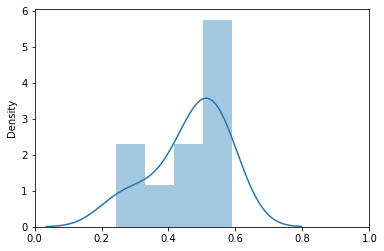

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(f1s)
plt.xlim(0, 1)
# plt.title('3 majority votes [n=120]')

### MV

In [20]:
k = 9
i = 0 # len(list(combinations(raters,k)))

In [21]:
len(list(combinations(raters,k))), list(combinations(raters,k))[i]

(10, ('R11', 'R14', 'R15', 'R16', 'R20', 'R21', 'R23', 'R26', 'R28'))

In [22]:
silvergt = pd.read_csv(f'./constructed/lesion-based_{k}_majority_votes.csv')
silvergt = silvergt[silvergt[f'{k}vote{i}']==1][['DB_PatientId','mask']]
silvergt = silvergt.reset_index(drop=True)
f1score(silvergt,THRES)

TP 23
FP 8
TN 50
FN 16
precision 0.7419354838709677
recall 0.5897435897435898
f1-score 0.6571428571428573


(0.7419354838709677, 0.5897435897435898, 0.6571428571428573)

In [23]:
omit_lst = list(set(range(1,101))-set(silvergt['DB_PatientId']))
omit_lst

[64, 49, 73]

#### MV average f1-score

In [5]:
def average_score(k, score):
    if score == 'precision': idx = 0
    elif score == 'recall': idx = 1
    elif score == 'f1': idx = 2
        
    scores=[]
    for i in range(len(list(combinations(raters,k)))):
        selected_raters = list(combinations(raters,k))[i]
        majority_votes_df = pd.read_csv(f'./constructed/lesion-based_{k}_majority_votes.csv')
        majority_votes_df = majority_votes_df[majority_votes_df[f'{k}vote{i}']==1][['DB_PatientId','mask']]
        majority_votes_df = majority_votes_df.reset_index(drop=True)
        scores.append(f1score(majority_votes_df,THRES,prnt=False)[idx])

    average_score_ = statistics.mean(scores)
    sd_score_ = statistics.stdev(scores)
    print(f'=={k} majority votes f1-score [n = {len(list(combinations(raters,k)))}]==')
    print(f'ㄴaverage: {average_score_}')
    print(f'ㄴstandard deviation: {sd_score_}')

    return scores, average_score_, sd_score_

In [26]:
avg_precision_9 = average_score(9,'precision')[0]
avg_precision_7 = average_score(7,'precision')[0]
avg_precision_5 = average_score(5,'precision')[0]
avg_precision_3 = average_score(3,'precision')[0]

avg_recall_9 = average_score(9,'recall')[0]
avg_recall_7 = average_score(7,'recall')[0]
avg_recall_5 = average_score(5,'recall')[0]
avg_recall_3 = average_score(3,'recall')[0]

avg_f1_9 = average_score(9,'f1')[0]
avg_f1_7 = average_score(7,'f1')[0]
avg_f1_5 = average_score(5,'f1')[0]
avg_f1_3 = average_score(3,'f1')[0]

==9 majority votes f1-score [n = 10]==
ㄴaverage: 0.7581182795698924
ㄴstandard deviation: 0.015706226514224993
==7 majority votes f1-score [n = 120]==
ㄴaverage: 0.762760068753319
ㄴstandard deviation: 0.026376233292309655
==5 majority votes f1-score [n = 252]==
ㄴaverage: 0.7614029236121937
ㄴstandard deviation: 0.029258420884323066
==3 majority votes f1-score [n = 120]==
ㄴaverage: 0.7430842454442108
ㄴstandard deviation: 0.03618243117672269
==9 majority votes f1-score [n = 10]==
ㄴaverage: 0.5952810967380929
ㄴstandard deviation: 0.021682591979676542
==7 majority votes f1-score [n = 120]==
ㄴaverage: 0.5926823585424356
ㄴstandard deviation: 0.02926313730758341
==5 majority votes f1-score [n = 252]==
ㄴaverage: 0.5817162058730867
ㄴstandard deviation: 0.04260711772111495
==3 majority votes f1-score [n = 120]==
ㄴaverage: 0.5716860471368338
ㄴstandard deviation: 0.057873957738516855
==9 majority votes f1-score [n = 10]==
ㄴaverage: 0.6667740257972958
ㄴstandard deviation: 0.017837947819285042
==7 majo

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

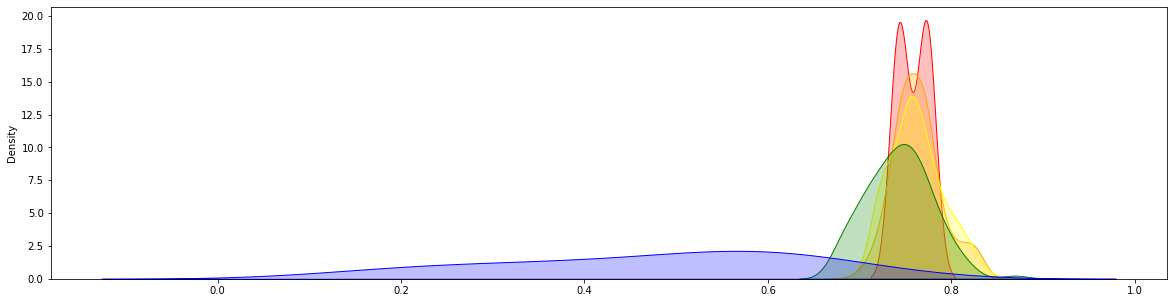

In [83]:
plt.figure(figsize=(20,5))

sns.kdeplot(data = avg_precision_9, color="red", shade=True)
sns.kdeplot(data = avg_precision_7, color="orange", shade=True)
sns.kdeplot(data = avg_precision_5, color="yellow", shade=True)
sns.kdeplot(data = avg_precision_3, color="green", shade=True)
sns.kdeplot(data = prec, color="blue", shade=True) # prec, rec, f1
plt.show()

In [107]:
from scipy import stats

t_stat, p_val = stats.ttest_ind(avg_f1_5, avg_f1_3,
                                equal_var=False)
print(f"t-statistics:{t_stat}, p-value: {p_val}")

t-statistics:3.8514632252418575, p-value: 0.00015918453018197172


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(average_score(9, 'f1')[0])
plt.xlim(0.5, 0.75)
# plt.title('3 majority votes [n=120]')

### Consensus

In [243]:
silvergt = pd.read_csv('./constructed/lesion-based_consensus2.csv')
silvergt = silvergt[['DB_PatientId','mask']]
silvergt = silvergt.reset_index(drop=True)
f1score(silvergt,THRES)

TP 21
FP 11
TN 50
FN 19
precision 0.65625
recall 0.525
f1-score 0.5833333333333334


0.5833333333333334

In [244]:
silvergt = pd.read_csv('./constructed/lesion-based_consensus3.csv')
silvergt = silvergt[['DB_PatientId','mask']]
silvergt = silvergt.reset_index(drop=True)
f1score(silvergt,THRES)

TP 21
FP 10
TN 49
FN 20
precision 0.6774193548387096
recall 0.5121951219512195
f1-score 0.5833333333333334


0.5833333333333334

### LCA

In [246]:
silvergt = pd.read_csv('./constructed/lesion-based_lca_2.csv')
silvergt = silvergt[['DB_PatientId','mask']]
silvergt = silvergt.reset_index(drop=True)
f1score(silvergt,THRES)

TP 22
FP 8
TN 50
FN 14
precision 0.7333333333333333
recall 0.6111111111111112
f1-score 0.6666666666666666


0.6666666666666666

In [247]:
silvergt = pd.read_csv('./constructed/lesion-based_lca_3.csv')
silvergt = silvergt[['DB_PatientId','mask']]
silvergt = silvergt.reset_index(drop=True)
f1score(silvergt,THRES)

TP 24
FP 9
TN 50
FN 18
precision 0.7272727272727273
recall 0.5714285714285714
f1-score 0.64


0.64

In [ ]:
# Target journal
IF >10
(25) Lancet digital health
(11 ->20?) Radiology v
(12) NPJ digital medicine (do as ai says)